# Naive Bayes

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("../data/spam.csv", encoding="latin-1")
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [11]:
df_no_nan = df.dropna(axis=1)
df_no_nan.columns = ["class", "content"]
df_no_nan.head()

,class,content
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


<Axes: xlabel='class', ylabel='count'>

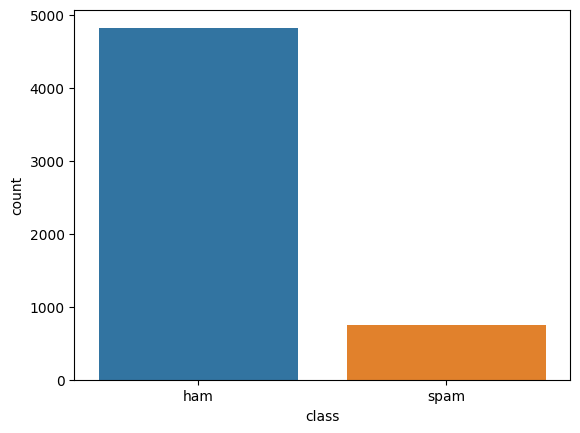

In [12]:
sns.countplot(data = df_no_nan, x="class")

In [15]:
df = pd.get_dummies(df_no_nan, columns=["class"], drop_first=True)
X,y = df["content"],df["class_spam"]
X.head()

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: content, dtype: object

In [16]:
y.head()

0    0
1    0
2    1
3    0
4    0
Name: class_spam, dtype: uint8

## TF-IDF 

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

tfidf_vectorizer = TfidfVectorizer(stop_words="english")
print(tfidf_vectorizer.get_stop_words()) 

frozenset({'has', 'becomes', 'many', 'next', 'you', 'onto', 'namely', 'even', 'once', 'these', 'on', 'be', 'what', 'can', 'its', 'before', 'con', 'nevertheless', 'thru', 'whole', 'fifty', 'four', 'almost', 'anywhere', 'his', 'others', 'during', 'while', 'i', 'eight', 'side', 'always', 'from', 'afterwards', 'indeed', 'so', 'for', 'except', 'very', 'although', 'anyway', 'throughout', 'together', 'an', 'do', 'across', 'down', 'thick', 'whereby', 'ever', 'cannot', 'such', 'somehow', 'around', 'thence', 'someone', 'much', 'to', 'our', 'into', 'forty', 'two', 'still', 'co', 'become', 'serious', 'hence', 'no', 'became', 'thus', 'nor', 'might', 'is', 'last', 'take', 'yourself', 'hereby', 'because', 'and', 'part', 'least', 'it', 'amongst', 'hereupon', 'first', 'some', 'other', 'each', 'towards', 'three', 'de', 'noone', 'have', 'after', 'bill', 'well', 'out', 'enough', 'though', 'becoming', 'move', 'made', 'herein', 'whatever', 'myself', 'third', 'see', 'nine', 'found', 'ourselves', 'over', 'by'

In [19]:
X_tfidf = tfidf_vectorizer.fit_transform(X)
X_tfidf

<5572x8404 sparse matrix of type '<class 'numpy.float64'>'
	with 43478 stored elements in Compressed Sparse Row format>

In [20]:
X_tfidf.min(), X_tfidf.max()

(0.0, 1.0)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.33, random_state=42) 
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3733, 8404), (1839, 8404), (3733,), (1839,))

<Axes: xlabel='class_spam', ylabel='count'>

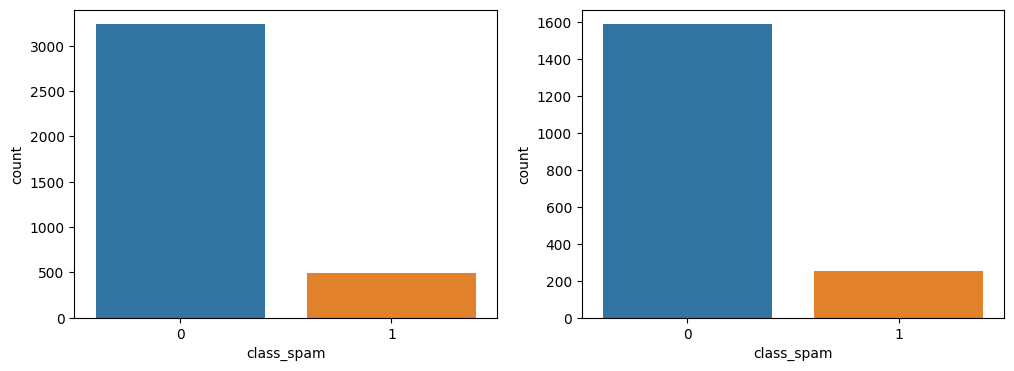

In [22]:
fig, ax = plt.subplots(1,2, figsize =(12,4))
sns.countplot(x=y_train, ax = ax[0])
sns.countplot(x=y_test, ax = ax[1])

## Naive bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB, ComplementNB, BernoulliNB

na